In [83]:
%load_ext autoreload
%autoreload 0
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from astimp import AST
import astimp
from astimp_tools import artist
from imageio import imread
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
from inhib_diameter_modes.sudent import _measureOneDiameter


def log(var_name):
  print(f"{var_name}: {eval(var_name)}")
  
def read_ast(path):
  """Load image from file, pad black, return ast"""
  img = imread(path)
  return AST(img)



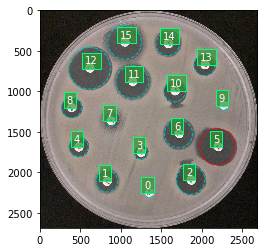

In [88]:
paths = glob("annotations/phase1_averages/images/*.jpg")

# BLOOD based images
# base = "/Users/marco/Documents/OneDrive - MSF/ASTapp Shared/Shared Guihem-Marco/database photo numbered/post-protocol/"
# paths = glob(base+"/blood/*.jpg")

ast = read_ast(paths[1])


artist.draw(ast)

full inhibiyion: True


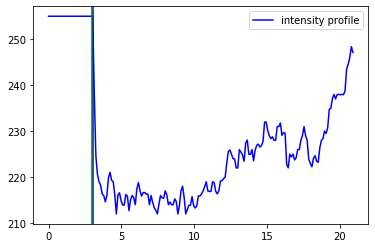

In [89]:
pellet_idx = 9
student_result = _measureOneDiameter(ast.preproc,pellet_idx)
sd = student_result["radius"]
print("full inhibiyion:", student_result["full_inhib"])
px_per_mm = ast.preproc.px_per_mm

d = ast.inhibitions[pellet_idx].diameter/2
y = astimp.radial_profile(ast.preproc,pellet_idx,1,0)
x = np.arange(len(y))/px_per_mm

plt.plot(x,y,'b', label="intensity profile")
if not student_result["full_inhib"]:
  plt.plot(student_result['x'],student_result['y'], 'g', label="student")
plt.axvline(d,color='b')
plt.axvline(sd,color='g')

plt.legend()